````
Un servidor recibe solicitudes las cuales son procesadas de una por vez en el orden de llegada (política FIFO).

Se determinó que en 10 milisegundos existe una probabilidad p =1/40 que llegue una nueva solicitud y una 
probabilidad q = 1/30 que una solicitud 
termine de ser procesada y deje el sistema. Se desea estudiar la cantidad de solicitudes en el servidor considerando tanto las que están en cola 
esperando ser procesadas como la solicitud que está siendo procesada.

- Determine la matriz de transición de estados explicando cómo se obtiene la misma.
- Utilizando Matlab, Octave o Python simule la evolución del sistema a lo largo de 1.000 segundos suponiendo que el servidor comienza sin estar 
procesando solicitudes.
- Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.
- Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado.
- Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes.

````

$$M=\begin{pmatrix}
1-(p * (1-q))&p * (1-q)&0&0&...&0\\
q * (1-p)&1 - (q * (1-p)) - (p * (1-q)) &p * (1-q)&0&...&0\\
0&q * (1-p)&1 - (q * (1-p)) - (p * (1-q)) &p * (1-q)&...&0\\
...&...&...&...&...\\
\end{pmatrix},$$

In [16]:
import random as rn
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
def simulacion(tiempo, step):
    p = 1/40
    q = 1/30
    
    estado = 0
    total = 0
    tiempos = []
    cantidad = []
    tiempoLibre = 0
    for x in range(0, tiempo * 1000, step):
        probabilidad = rn.random()
        
        if (estado == 0):
            if (probabilidad <= (p * (1-q))):
                total += 1
                estado += 1
            else:
                tiempoLibre += step
        else:
            if (probabilidad <= (q *  (1-p))):
                estado -= 1
            elif (probabilidad >= 1 - (p *  (1-q))):
                total += 1
                estado += 1
        
        
        tiempos.append(x)
        cantidad.append(estado)
    return tiempos, cantidad, total, tiempoLibre

In [90]:
tiempos, cantidad, totalProcesados, tiempoLibre = simulacion(1000, 10)

b. Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.


Text(0, 0.5, 'Cantidad de Solicitudes')

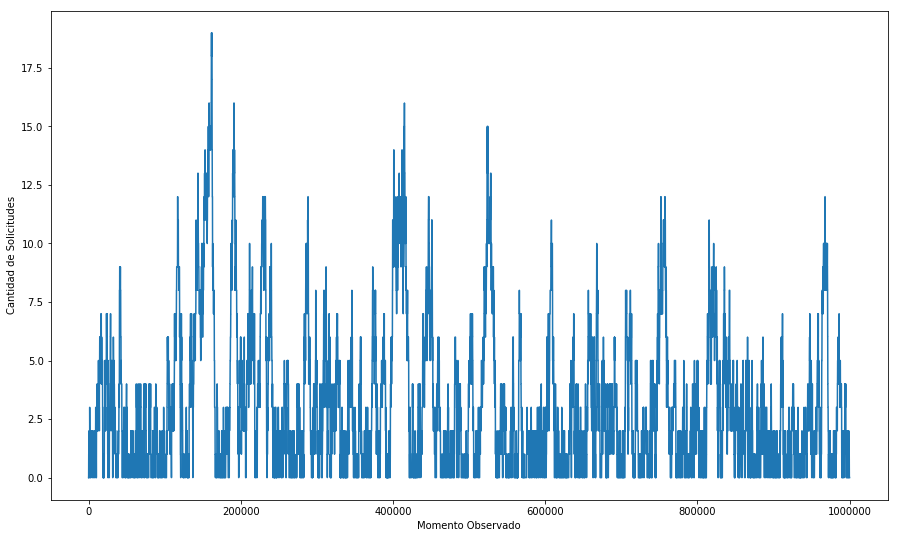

In [91]:
print("b. Realice un gráfico mostrando la cantidad de solicitudes en el servidor en cada instante de tiempo.")
plt.figure(figsize=(15,9))
plt.plot(tiempos, cantidad)
plt.xlabel('Momento Observado')
plt.ylabel('Cantidad de Solicitudes')

c. Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado


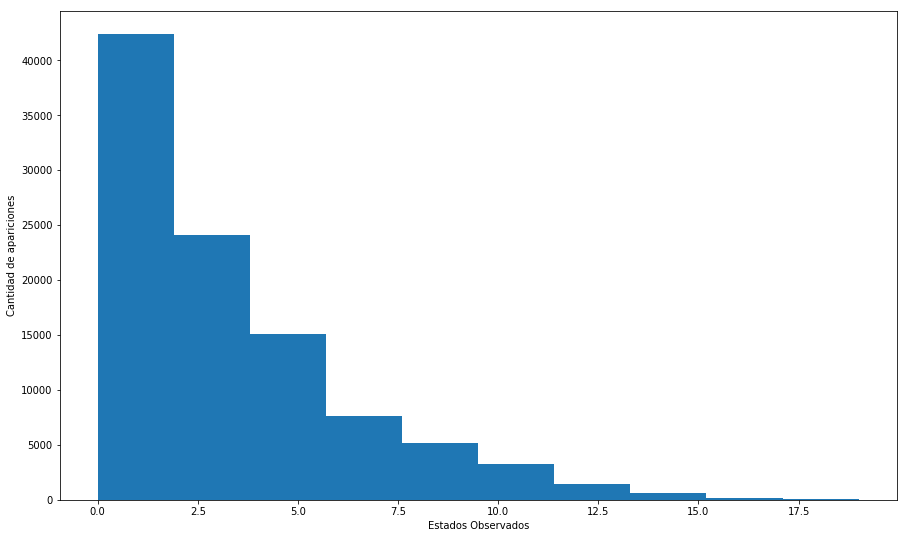

In [92]:
print("c. Realice un histograma mostrando cuantas veces el sistema estuvo en cada estado")
plt.figure(figsize=(15,9))
plt.hist(cantidad)
plt.xlabel('Estados Observados')
plt.ylabel('Cantidad de apariciones')
plt.show()

In [93]:
print("d. Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes")
print(str(((tiempoLibre / 1000) * 100) / 1000) + "%")

d. Determine el % de tiempo que el servidor se encuentra sin procesar solicitudes
23.738%
